*best viewed in [nbviewer](https://nbviewer.jupyter.org/github/CambridgeSemiticsLab/BH_time_collocations/blob/master/results/notebooks/6_definite_modifier.ipynb)*

# Time Adverbial Distribution and Collocations
## Definite modifier investigations
### Cody Kingham
<a href="../../../docs/sponsors.md"><img height=200px width=200px align="left" src="../../../docs/images/CambridgeU_BW.png"></a>

In [1]:
! echo "last updated:"; date

last updated:
Mon  6 Jul 2020 14:26:55 BST


## Introduction

This notebook will produce data for my in-progress article on time adverbial components. 

<hr>

# Python

Now we import the modules and data needed for the analysis.

In [2]:
# see .py's for variables
from config import *
from get_hmod_sample import hm_df
from statsmodels.graphics.mosaicplot import mosaic
from matplotlib import cm

In [3]:
TF.load('domain', add=True)

  0.00s loading features ...
  0.03s All additional features loaded - for details use loadLog()


In [4]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 0)

In [5]:
def show_examples(value_counts, df, n_examples=50, condenseType='sentence', **kwargs):
    """Prepares and shows examples from a supplied Series.value_counts()"""
    
    n_to_get = ((value_counts / value_counts.sum()) * n_examples).round()
    samples = []
    
    for word in n_to_get.index:
        n = int(n_to_get.loc[word]) or 1
        examples = df[df['head_voc'] == word]
        get_ilocs = get_spread(examples.shape[0], n)
        return_ex = examples.iloc[get_ilocs, :]
        samples.extend(return_ex.index)
        
    samples = [(ph, L.u(ph, 'sentence')[0]) for ph in samples]
    A.table(samples, condenseType=condenseType, **kwargs)

<hr>

# Examples

## Definite Time and Locas

In [6]:
loca = hm_df[hm_df.function == 'Loca']
time = hm_df[hm_df.function == 'Time'].copy()
defi_time = hm_df[(hm_df.function=='Time') & hm_df.definite]
defi_loca  = hm_df[(hm_df.function=='Loca') & hm_df.definite]

In [7]:
def_loc_counts = defi_loca.classi.value_counts()

def_loc_counts

single.prep.definite                                 505
single.prep.definite.def_apposition.demonstrative    31 
single.definite                                      23 
single.prep.definite.quantified.qualitative          14 
single.prep.definite.def_apposition                  8  
single.prep.definite.quantified.cardinal             4  
single.definite.def_apposition.ordinal               1  
single.prep.definite.def_apposition.ordinal          1  
single.component.definite                            1  
single.definite.def_apposition.demonstrative         1  
Name: classi, dtype: int64

In [8]:
def_loc_counts.sum()

589

In [9]:
def_loc_counts / def_loc_counts.sum()

single.prep.definite                                 0.857385
single.prep.definite.def_apposition.demonstrative    0.052632
single.definite                                      0.039049
single.prep.definite.quantified.qualitative          0.023769
single.prep.definite.def_apposition                  0.013582
single.prep.definite.quantified.cardinal             0.006791
single.definite.def_apposition.ordinal               0.001698
single.prep.definite.def_apposition.ordinal          0.001698
single.component.definite                            0.001698
single.definite.def_apposition.demonstrative         0.001698
Name: classi, dtype: float64

In [10]:
def_time_counts = defi_time.classi.value_counts()

def_time_counts

single.prep.definite.def_apposition.demonstrative                      458
single.prep.definite                                                   333
single.definite                                                        221
single.prep.definite.def_apposition.ordinal                            161
single.definite.quantified.qualitative                                 92 
single.definite.def_apposition.demonstrative                           30 
single.component.prep.definite                                         12 
single.prep.definite.quantified.cardinal                               7  
single.prep.definite.quantified.qualitative                            5  
single.definite.quantified.cardinal                                    3  
single.definite.def_apposition.demonstrative.quantified.qualitative    2  
single.prep.definite.def_apposition                                    2  
single.prep.definite.adjective                                         2  
single.component.prep.def

In [11]:
def_time_counts.sum()

1331

In [12]:
def_time_counts / def_time_counts.sum()

single.prep.definite.def_apposition.demonstrative                      0.344102
single.prep.definite                                                   0.250188
single.definite                                                        0.166041
single.prep.definite.def_apposition.ordinal                            0.120962
single.definite.quantified.qualitative                                 0.069121
single.definite.def_apposition.demonstrative                           0.022539
single.component.prep.definite                                         0.009016
single.prep.definite.quantified.cardinal                               0.005259
single.prep.definite.quantified.qualitative                            0.003757
single.definite.quantified.cardinal                                    0.002254
single.definite.def_apposition.demonstrative.quantified.qualitative    0.001503
single.prep.definite.def_apposition                                    0.001503
single.prep.definite.adjective          

### single.prep.definite

In [13]:
show = ['function', 'ref', 'text', 'sentence']
most_common = 'single.prep.definite' # <- this is the phrase classi that has most overlap between Loca and Time

most_common_loca = defi_loca[defi_loca.classi == most_common]
most_common_time = defi_time[defi_time.classi == most_common]

In [14]:
most_common_loca.leading_prep.value_counts()

ב      347
על     55 
תחת    33 
מן     26 
ל      19 
אל     9  
בין    3  
אחר    3  
נגד    3  
את     2  
אצל    2  
בעד    1  
עד     1  
נכח    1  
Name: leading_prep, dtype: int64

In [15]:
most_common_time.leading_prep.value_counts()

ב      197
עד     64 
ל      42 
כ      11 
בין    10 
אחר    5  
מן     3  
בלת    1  
Name: leading_prep, dtype: int64

In [16]:
# Loca heads in prep + def + noun context
loca_heads = pd.DataFrame(most_common_loca.head_voc.value_counts()[:20])

loca_heads

,head_voc
אֶרֶץ,64
מִדְבָּר,57
שָׂדֶה,26
שֶׁמֶשׁ,25
הַר,24
שָׁמַיִם,20
דֶּרֶךְ,19
בַּיִת,18
עִיר,18
מִזְבֵּחַ,14


In [17]:
top_loca_heads = pd.DataFrame(loca.head_voc.value_counts().head(20))

top_loca_heads

,head_voc
שָׁם,309
אֶרֶץ,203
בַּיִת,89
מִדְבָּר,73
הַר,72
יְרוּשָׁלִַם,50
עִיר,42
מָקֹום,39
שָׂדֶה,36
שַׁעַר,32


In [18]:
top_loca_heads.sum()

head_voc    1203
dtype: int64

In [19]:
top_loca_heads / top_loca_heads.sum() 

,head_voc
שָׁם,0.256858
אֶרֶץ,0.168745
בַּיִת,0.073982
מִדְבָּר,0.060682
הַר,0.059850
יְרוּשָׁלִַם,0.041563
עִיר,0.034913
מָקֹום,0.032419
שָׂדֶה,0.029925
שַׁעַר,0.026600


In [20]:
# Time heads in prep + def + noun context

time_heads = pd.DataFrame(most_common_time.head_voc.value_counts())

time_heads

,head_voc
בֹּקֶר,100
עֶרֶב,79
יֹום,44
לַיְלָה,23
רִאשֹׁון,15
צָהֳרַיִם,12
מֹועֵד,5
שָׁנָה,5
עֵת,5
שַׁבָּת,4


In [21]:
time.head_voc.value_counts()

יֹום         1353
עַתָּה       356 
שָׁנָה       261 
עֹולָם       178 
עֵת          155 
            ...  
דבר          1   
עֵילֹום      1   
שָׁמַיִם     1   
מִצְרַיִם    1   
חָצִיר       1   
Name: head_voc, Length: 116, dtype: int64

In [22]:
time.head_voc.value_counts().sum()

3493

In [23]:
time.head_voc.value_counts() / time.head_voc.value_counts().sum() 

יֹום         0.387346
עַתָּה       0.101918
שָׁנָה       0.074721
עֹולָם       0.050959
עֵת          0.044374
               ...   
דבר          0.000286
עֵילֹום      0.000286
שָׁמַיִם     0.000286
מִצְרַיִם    0.000286
חָצִיר       0.000286
Name: head_voc, Length: 116, dtype: float64

In [24]:
# export table for paper
all_heads = [
    pd.DataFrame(time_heads.head(10).reset_index().values, columns=['Time head', 'freq']),
    pd.DataFrame(loca_heads.head(10).reset_index().values, columns=['Loca head', 'freq'])
]

all_heads = pd.concat(all_heads, 1)

all_heads.to_clipboard(index=False)
all_heads

,Time head,freq,Loca head,freq
0,בֹּקֶר,100,אֶרֶץ,64
1,עֶרֶב,79,מִדְבָּר,57
2,יֹום,44,שָׂדֶה,26
3,לַיְלָה,23,שֶׁמֶשׁ,25
4,רִאשֹׁון,15,הַר,24
5,צָהֳרַיִם,12,שָׁמַיִם,20
6,מֹועֵד,5,דֶּרֶךְ,19
7,שָׁנָה,5,בַּיִת,18
8,עֵת,5,עִיר,18
9,שַׁבָּת,4,מִזְבֵּחַ,14


## Extract examples of definite versus non-definite entities

In [25]:
# build a column of text types (Narrative or Quotation)

text_type = []

for tp in time.index:
    clause = L.u(tp, 'clause')[0]
    txt = F.domain.v(clause)
    text_type.append(txt)
    
time['text_type'] = text_type

time.text_type.value_counts()

Q    2170
N    1047
?    169 
D    107 
Name: text_type, dtype: int64

In [26]:
# import nominal definitions from earlier PCA pos
pca_pos = pd.read_csv('../../spreadsheets/advb_article/pos_PCA.csv')

pca_pos.head()

,head_lexn,head,head_pos,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,1437595,יום,subs,0.486032,0.053467,-0.042813,0.015354,0.089755,0.102405,0.038150,0.014411,-1.500882e-17
1,1437627,שׁנה,subs,0.440417,-0.160218,-0.139755,0.441079,-0.049093,0.004349,-0.056177,0.001519,-5.229864e-17
2,1437815,עתה,advb,-0.588959,0.019705,-0.004540,-0.005139,-0.001547,0.002973,-0.009121,-0.001914,-5.271445e-17
3,1438005,עת,subs,0.471130,0.113035,0.115861,-0.044042,0.111814,0.224024,0.013885,-0.051044,6.929722e-17
4,1437819,עולם,subs,-0.537903,0.011518,-0.016600,-0.010721,0.006830,-0.011030,-0.008283,-0.000823,-3.751634e-17


In [27]:
# isolate true nominals based on the PCA analysis
nom_lexs = pca_pos[pca_pos.PC1 > 0.2].head_lexn.values

In [28]:
time[
    (time.head_lexn.isin(nom_lexs))
    & (time.has_nom == False)
][show][:200].head(200)

,function,ref,text,sentence
node,,,,
655087,Time,Gen 14:15,לַ֛יְלָה,וַיֵּחָלֵ֨ק עֲלֵיהֶ֧ם׀ לַ֛יְלָה ה֥וּא וַעֲבָדָ֖יו
661450,Time,Gen 30:33,בְּיֹ֣ום,וְעָֽנְתָה־בִּ֤י צִדְקָתִי֙ בְּיֹ֣ום מָחָ֔ר
673213,Time,Exod 12:10,עַד־בֹּ֑קֶר,וְלֹא־תֹותִ֥ירוּ מִמֶּ֖נּוּ עַד־בֹּ֑קֶר
673218,Time,Exod 12:10,עַד־בֹּ֖קֶר,וְהַנֹּתָ֥ר מִמֶּ֛נּוּ עַד־בֹּ֖קֶר בָּאֵ֥שׁ תִּשְׂרֹֽפוּ׃
673402,Time,Exod 12:22,עַד־בֹּֽקֶר׃,וְאַתֶּ֗ם לֹ֥א תֵצְא֛וּ אִ֥ישׁ מִפֶּֽתַח־בֵּיתֹ֖ו עַד־בֹּֽקֶר׃
673497,Time,Exod 12:30,לַ֗יְלָה,וַיָּ֨קָם פַּרְעֹ֜ה לַ֗יְלָה ה֤וּא וְכָל־עֲבָדָיו֙ וְכָל־מִצְרַ֔יִם
673512,Time,Exod 12:31,לַ֗יְלָה,וַיִּקְרָא֩ לְמֹשֶׁ֨ה וּֽלְאַהֲרֹ֜ן לַ֗יְלָה
673963,Time,Exod 13:21,לַ֛יְלָה,וַֽיהוָ֡ה הֹלֵךְ֩ לִפְנֵיהֶ֨ם יֹומָ֜ם בְּעַמּ֤וּד עָנָן֙ לַנְחֹתָ֣ם הַדֶּ֔רֶךְ וְלַ֛יְלָה בְּעַמּ֥וּד אֵ֖שׁ לְהָאִ֣יר לָהֶ֑ם לָלֶ֖כֶת יֹומָ֥ם וָלָֽיְלָה׃
673975,Time,Exod 13:22,לָ֑יְלָה,וְעַמּ֥וּד הָאֵ֖שׁ לָ֑יְלָה לִפְנֵ֖י הָעָֽם׃ פ


In [33]:
select_cases = time[
    (time.head_etcbc.isin(['BQR=/', '<RB/']))
    & (time.head_lexn.isin(nom_lexs))
    & (time.leading_prep.isin({'ל', 'עד', 'מן'}))
]

select_cases[show]

,function,ref,text,sentence
node,,,,
669129,Time,Gen 49:27,לָעֶ֖רֶב,וְלָעֶ֖רֶב יְחַלֵּ֥ק שָׁלָֽל׃
673213,Time,Exod 12:10,עַד־בֹּ֑קֶר,וְלֹא־תֹותִ֥ירוּ מִמֶּ֖נּוּ עַד־בֹּ֑קֶר
673218,Time,Exod 12:10,עַד־בֹּ֖קֶר,וְהַנֹּתָ֥ר מִמֶּ֛נּוּ עַד־בֹּ֖קֶר בָּאֵ֥שׁ תִּשְׂרֹֽפוּ׃
673402,Time,Exod 12:22,עַד־בֹּֽקֶר׃,וְאַתֶּ֗ם לֹ֥א תֵצְא֛וּ אִ֥ישׁ מִפֶּֽתַח־בֵּיתֹ֖ו עַד־בֹּֽקֶר׃
674943,Time,Exod 16:19,עַד־בֹּֽקֶר׃,אִ֕ישׁ אַל־יֹותֵ֥ר מִמֶּ֖נּוּ עַד־בֹּֽקֶר׃
674952,Time,Exod 16:20,עַד־בֹּ֔קֶר,וַיֹּותִ֨רוּ אֲנָשִׁ֤ים מִמֶּ֨נּוּ֙ עַד־בֹּ֔קֶר
675006,Time,Exod 16:23,עַד־הַבֹּֽקֶר׃,וְאֵת֙ כָּל־הָ֣עֹדֵ֔ף הַנִּ֧יחוּ לָכֶ֛ם לְמִשְׁמֶ֖רֶת עַד־הַבֹּֽקֶר׃
675010,Time,Exod 16:24,עַד־הַבֹּ֔קֶר,וַיַּנִּ֤יחוּ אֹתֹו֙ עַד־הַבֹּ֔קֶר כַּאֲשֶׁ֖ר צִוָּ֣ה מֹשֶׁ֑ה
675546,Time,Exod 18:13,מִן־הַבֹּ֖קֶר,וַיַּעֲמֹ֤ד הָעָם֙ עַל־מֹשֶׁ֔ה מִן־הַבֹּ֖קֶר עַד־הָעָֽרֶב׃


In [36]:
refs = []
for node in select_cases[select_cases.book == 'Exodus'].index:
    book, chapter, verse = T.sectionFromNode(node)
    refs.append(f'{chapter}:{verse}')
    
print(', '.join(refs))

12:10, 12:10, 12:22, 16:19, 16:20, 16:23, 16:24, 18:13, 18:13, 18:14, 18:14, 27:21, 27:21, 29:34, 34:2


In [50]:
# Select a spread of additional examples of anchoring 
# using demonstratives, ordinals, and genitives

examples = []

spread_per_modi = 10
for modi in ['demonstrative', 'ordinal', 'genitive']:
    samples = time[time[modi]]
    spread = get_spread(samples, spread_per_modi)
    examples.extend(spread.index)
    
examples

[653404,
 694011,
 718262,
 730973,
 743140,
 770463,
 780016,
 825305,
 875169,
 904349,
 651923,
 675045,
 685065,
 690482,
 694498,
 709427,
 747594,
 800929,
 875706,
 902852,
 652089,
 687837,
 704014,
 737164,
 773691,
 795707,
 824106,
 841806,
 873163,
 904708]

In [52]:
time.loc[examples][['ref', 'text', 'sentence']].to_clipboard(index=False)
time.loc[examples][['ref', 'text', 'sentence']]

,ref,text,sentence
node,,,
653404,Gen 7:11,בַּיֹּ֣ום הַזֶּ֗ה,בִּשְׁנַ֨ת שֵׁשׁ־מֵאֹ֤ות שָׁנָה֙ לְחַיֵּי־נֹ֔חַ בַּחֹ֨דֶשׁ֙ הַשֵּׁנִ֔י בְּשִׁבְעָֽה־עָשָׂ֥ר יֹ֖ום לַחֹ֑דֶשׁ בַּיֹּ֣ום הַזֶּ֗ה נִבְקְעוּ֙ כָּֽל־מַעְיְנֹת֙ תְּהֹ֣ום רַבָּ֔ה
694011,Num 6:11,בַּיֹּ֥ום הַהֽוּא׃,וְקִדַּ֥שׁ אֶת־רֹאשֹׁ֖ו בַּיֹּ֥ום הַהֽוּא׃
718262,Josh 8:25,בַּיֹּ֤ום הַהוּא֙,וַיְהִי֩ כָל־הַנֹּ֨פְלִ֜ים בַּיֹּ֤ום הַהוּא֙ מֵאִ֣ישׁ וְעַד־אִשָּׁ֔ה שְׁנֵ֥ים עָשָׂ֖ר אָ֑לֶף כֹּ֖ל אַנְשֵׁ֥י הָעָֽי׃
730973,Judg 20:26,בַיֹּום־הַה֖וּא,וַיָּצ֥וּמוּ בַיֹּום־הַה֖וּא עַד־הָעָ֑רֶב
743140,1 Sam 29:8,עַ֖ד הַיֹּ֣ום הַזֶּ֑ה,וּמַה־מָּצָ֣אתָ בְעַבְדְּךָ֔ מִיֹּום֙ אֲשֶׁ֣ר הָיִ֣יתִי לְפָנֶ֔יךָ עַ֖ד הַיֹּ֣ום הַזֶּ֑ה
770463,2 Kgs 16:6,עַ֖ד הַיֹּ֥ום הַזֶּֽה׃ פ,וַיֵּ֣שְׁבוּ שָׁ֔ם עַ֖ד הַיֹּ֥ום הַזֶּֽה׃ פ
780016,Isa 29:18,בַיֹּום־הַה֛וּא,וְשָׁמְע֧וּ בַיֹּום־הַה֛וּא הַחֵרְשִׁ֖ים דִּבְרֵי־סֵ֑פֶר
825305,Joel 3:2,בַּיָּמִ֣ים הָהֵ֔מָּה,וְגַ֥ם עַל־הָֽעֲבָדִ֖ים וְעַל־הַשְּׁפָחֹ֑ות בַּיָּמִ֣ים הָהֵ֔מָּה אֶשְׁפֹּ֖וךְ אֶת־רוּחִֽי׃
875169,Esth 6:1,בַּלַּ֣יְלָה הַה֔וּא,בַּלַּ֣יְלָה הַה֔וּא נָדְדָ֖ה שְׁנַ֣ת הַמֶּ֑לֶךְ


### Select Non-prep Examples

In [68]:
non_preps = time[
     (time.head_lexn.isin(nom_lexs))
     & (~time.preposition)
]

# non_preps[show][:50]

In [69]:
non_preps.groupby(['quantified', 'definite']).size()

quantified  definite
False       False       84 
            True        251
True        False       399
            True        97 
dtype: int64

In [72]:
# have a look at those cases which are neither definite or quantified
# many are marked plural, others are single adverbial uses like לילה

# non_preps[
#     (non_preps.definite == False)
#     & (non_preps.quantified == False)
# ][show]

In [77]:
# prepare spread of definite versus quantified cases

n_spread = 10

examples = []

for modi in ['quantified', 'definite']:
    samples = non_preps[non_preps[modi] == True]
    samples = get_spread(samples, n_spread)
    examples.extend(samples.index)
    
examples

[652380,
 674586,
 693932,
 713241,
 733313,
 759969,
 773749,
 839483,
 880406,
 904708,
 652659,
 704630,
 712488,
 718846,
 736370,
 745081,
 758658,
 800430,
 850302,
 904397]

In [80]:
non_preps.loc[examples][['ref', 'text', 'sentence']].to_clipboard(index=False)
non_preps.loc[examples][show]

,function,ref,text,sentence
node,,,,
652380,Time,Gen 3:14,כָּל־יְמֵ֥י חַיֶּֽיךָ׃,וְעָפָ֥ר תֹּאכַ֖ל כָּל־יְמֵ֥י חַיֶּֽיךָ׃
674586,Time,Exod 15:22,שְׁלֹֽשֶׁת־יָמִ֛ים,וַיֵּלְכ֧וּ שְׁלֹֽשֶׁת־יָמִ֛ים בַּמִּדְבָּ֖ר
693932,Time,Num 6:4,כֹּ֖ל יְמֵ֣י נִזְרֹ֑ו,כֹּ֖ל יְמֵ֣י נִזְרֹ֑ו מִכֹּל֩ אֲשֶׁ֨ר יֵעָשֶׂ֜ה מִגֶּ֣פֶן הַיַּ֗יִן מֵחַרְצַנִּ֛ים וְעַד־זָ֖ג לֹ֥א יֹאכֵֽל׃
713241,Time,Deut 28:29,כָּל־הַיָּמִ֖ים,וְהָיִ֜יתָ אַ֣ךְ עָשׁ֧וּק וְגָז֛וּל כָּל־הַיָּמִ֖ים
733313,Time,1 Sam 6:1,שִׁבְעָ֥ה חֳדָשִֽׁים׃,וַיְהִ֧י אֲרֹון־יְהוָ֛ה בִּשְׂדֵ֥ה פְלִשְׁתִּ֖ים שִׁבְעָ֥ה חֳדָשִֽׁים׃
759969,Time,1 Kgs 14:21,שֲׁבַ֨ע עֶשְׂרֵ֥ה שָׁנָ֣ה׀,וּֽשֲׁבַ֨ע עֶשְׂרֵ֥ה שָׁנָ֣ה׀ מָלַ֣ךְ בִּירוּשָׁלִַ֗ם הָ֠עִיר אֲשֶׁר־בָּחַ֨ר יְהוָ֜ה לָשׂ֨וּם אֶת־שְׁמֹ֥ו שָׁם֙ מִכֹּל֙ שִׁבְטֵ֣י יִשְׂרָאֵ֔ל
773749,Time,2 Kgs 24:18,אַחַ֤ת עֶשְׂרֵה֙ שָׁנָ֔ה,וְאַחַ֤ת עֶשְׂרֵה֙ שָׁנָ֔ה מָלַ֖ךְ בִּירוּשָׁלִָ֑ם
839483,Time,Ps 37:26,כָּל־הַ֭יֹּום,כָּל־הַ֭יֹּום חֹונֵ֣ן
880406,Time,Dan 10:13,עֶשְׂרִ֣ים וְאֶחָ֣ד יֹ֔ום,וְשַׂ֣ר׀ מַלְכ֣וּת פָּרַ֗ס עֹמֵ֤ד לְנֶגְדִּי֙ עֶשְׂרִ֣ים וְאֶחָ֣ד יֹ֔ום


In [76]:
time.loc[730191]['quantified']

node
730191    False
730191    True 
Name: quantified, dtype: bool

# Annotate Kinds of Definiteness in Simple Prepositional Phrases 

In [25]:
annote_location = paths.project.joinpath('results/spreadsheets/advb_article')

In [26]:
## prepare manual tagging dataset


#dataset = []
#cols = ['ref', 'head_voc', 'text', 'sentence']

#for function, df in [('Time', most_common_time), ('Loca', most_common_loca)]:
#    export_df = df[cols].copy()
#    export_df['link'] = [A.webLink(ph, urlOnly=True) for ph in df.index]
#    export_df.to_csv(annote_location.joinpath(f'{function}_definite.csv'))

In [27]:
most_common_time.shape[0] 

333

In [28]:
most_common_loca.shape[0]

505

In [29]:
most_common_loca.shape[0] + most_common_time.shape[0]

838

### Import annotated data

In [30]:
ann_loca = pd.read_csv(annote_location.joinpath('Loca_definite_annotated.csv'))
ann_time = pd.read_csv(annote_location.joinpath('Time_definite_annotated.csv'))
for df in [ann_loca, ann_time]:
    df.set_index('node', inplace=True)

In [31]:
# merge annotations with additional data
combined_annotes = pd.concat([ann_loca['category'], ann_time['category']])
ann_df = pd.concat([hm_df, combined_annotes], 1, join='inner').fillna(False)

In [32]:
ann_count = pd.pivot_table(
    ann_df,
    index='function',
    columns=['genre', 'category'],
    aggfunc='size',
    fill_value=0,
)
ann_count

genre    instruction                 list                 poetry       \
category        anap frame glob imme anap frame glob name  frame glob   
function                                                                
Loca      17          21    10   3    0    1     7    2    14     77    
Time      0           1     55   0    2    0     4    0    1      45    

genre    prophetic                      prose                       
category      anap frame glob imme name  anap frame glob imme name  
function                                                            
Loca      5         9     66   3    2    50    80    111  4    23   
Time      0         8     41   1    0    2     9     138  26   0

In [34]:
np.zeros(2)

array([0., 0.])

In [35]:
count_tables = {} 
prop_tables = {}
stacked_tables = {}

all_genre = ann_count.groupby(level='category', axis=1).sum()
count_tables['all'] = all_genre
prop_tables['all'] = all_genre.div(all_genre.sum(1), 0)
stacked_tables['all'] = prop_tables['all'].stack()

print('all')
display(count_tables['all'])
display(prop_tables['all'])
print()

for genre in ['prose', 'prophetic', 'poetry']:
    genre_count = ann_count[(genre,)]
    sum_count = genre_count.sum(1)
    prop_count = genre_count.div(sum_count, 0)
    count_tables[genre] = sum_count
    prop_tables[genre] = prop_count
    stacked_tables[genre] = prop_count.stack()
    
    print(genre)
    display(genre_count)
    display(prop_count)
    print()
    
# add missing values to poetry
#for missing in ['imme', 'anap', 'name']:
#    prop_tables['poetry'][missing] = np.zeros(2)

all


category,anap,frame,glob,imme,name
function,,,,,
Loca,72,125,271,10,27
Time,4,19,283,27,0


category,anap,frame,glob,imme,name
function,,,,,
Loca,0.142574,0.247525,0.536634,0.019802,0.053465
Time,0.012012,0.057057,0.849850,0.081081,0.000000



prose


category,anap,frame,glob,imme,name
function,,,,,
Loca,50,80,111,4,23
Time,2,9,138,26,0


category,anap,frame,glob,imme,name
function,,,,,
Loca,0.186567,0.298507,0.414179,0.014925,0.085821
Time,0.011429,0.051429,0.788571,0.148571,0.000000



prophetic


category,anap,frame,glob,imme,name
function,,,,,
Loca,5,9,66,3,2
Time,0,8,41,1,0


category,anap,frame,glob,imme,name
function,,,,,
Loca,0.058824,0.105882,0.776471,0.035294,0.023529
Time,0.000000,0.160000,0.820000,0.020000,0.000000



poetry


category,frame,glob
function,,
Loca,14,77
Time,1,45


category,frame,glob
function,,
Loca,0.153846,0.846154
Time,0.021739,0.978261


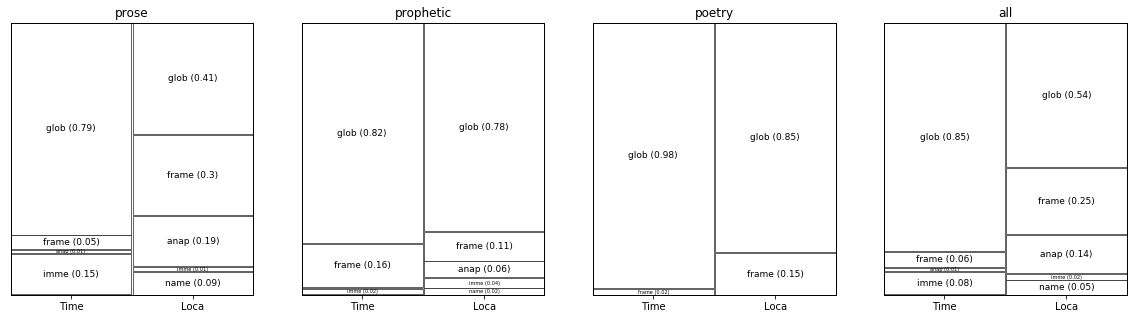

In [36]:
# configs for the mosaic plot

prop_indices = prop_tables['all'].stack().index

def labelizer(key):
    cat = key[1]
    value = round(stacked_tables[genre][key], 2)
    return f'{cat} ({value})'

tile_properties = lambda k: {'facecolor': 'white', 'edgecolor': 'black', 'linewidth': 0.6}

# make the plots
fig = plt.figure(figsize=(20, 5))

i = 1

for genre in ('prose', 'prophetic', 'poetry', 'all'):
    
    props = prop_tables[genre]
    
    ax = fig.add_subplot(1, 4, i)
    
    # config and sort the prop table
    props = props.loc[['Time', 'Loca'], :]
    plot_order = props.quantile(0.75).sort_values().index
    plot_prop = props[plot_order]
    
    mosaic(
        plot_prop.stack(), 
        ax=ax, 
        properties=tile_properties, 
        labelizer=labelizer,
        axes_label=True,
    )
    
    ax.set_title(genre)
    ax.set_yticks([], [])
    ax.set_yticklabels([])
    
    # change fontsize
    new_texts = []
    for text, sample in zip(ax.texts, plot_prop.values.flatten()):
        if 0.01 < sample < 0.05:
            text.set_size(5)
        elif sample >= 0.05:
            text.set_size(9)
        else:
            text.set_text('')
    i += 1
    
savefig('prop_defi_mosaic')

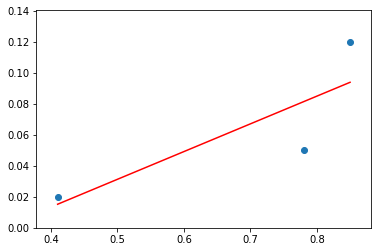

In [37]:
from scipy.stats import linregress
x = np.array([0.41, 0.78, 0.85])
y = np.array([0.02, 0.05, 0.12])

slope, intercept, r, p, std_err = linregress(x,y)
lin_reg_y = slope * x + intercept

plt.scatter(x, y)
plt.plot(x, lin_reg_y, color='red')

In [40]:
lin_reg_y

array([0.0150328 , 0.08122242, 0.09374478])

In [ ]:
p

In [ ]:
r

In [47]:
std_err

0.12290640793124417